## Problema de Negocio:
usando dados de vendas de 2023 seria possível prever o total de vendas em Janeiro de 2024?

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python:', python_version())

Python: 3.11.5


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

## Carregando Dados

In [3]:
# Carregando os dados
dataset = pd.read_csv('dataset.csv')

In [4]:
dataset.shape

(365, 2)

In [5]:
dataset.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [6]:
 dataset.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [7]:
dataset.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


## Pré-Processamento dos Dados

In [8]:
# Valor mínimo da coluna data
dataset["Data"].min()

'2023-01-01'

In [9]:
# Valor máximo da coluna data
dataset["Data"].max()

'2023-12-31'

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [11]:
# Converte a coluna de data para o tipo datetime
dataset['Data'] = pd.to_datetime(dataset['Data'])

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [13]:
dataset.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [14]:
# Converte o DataFrame em uma série temporal com a data como índice
serie_temporal = dataset.set_index('Data')['Total_Vendas']

In [15]:
type(serie_temporal)

pandas.core.series.Series

In [18]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [19]:
# Fornece a frequência da série temporal diária neste caso
serie_temporal = serie_temporal.asfreq('D')

In [20]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

## Análise Exploratoria

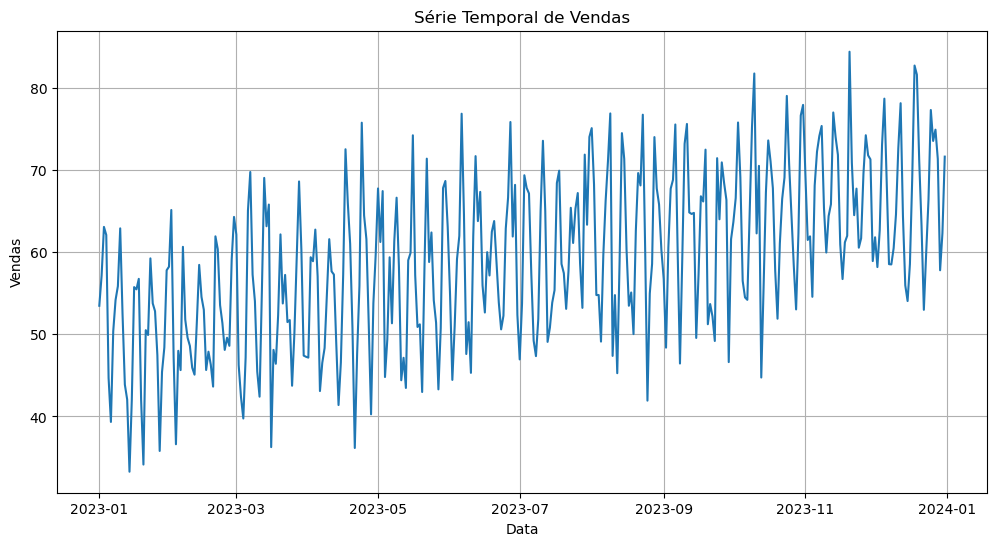

In [22]:
# Cria o gráfico da série temporal
plt.figure(figsize=(12,6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid()
plt.show()

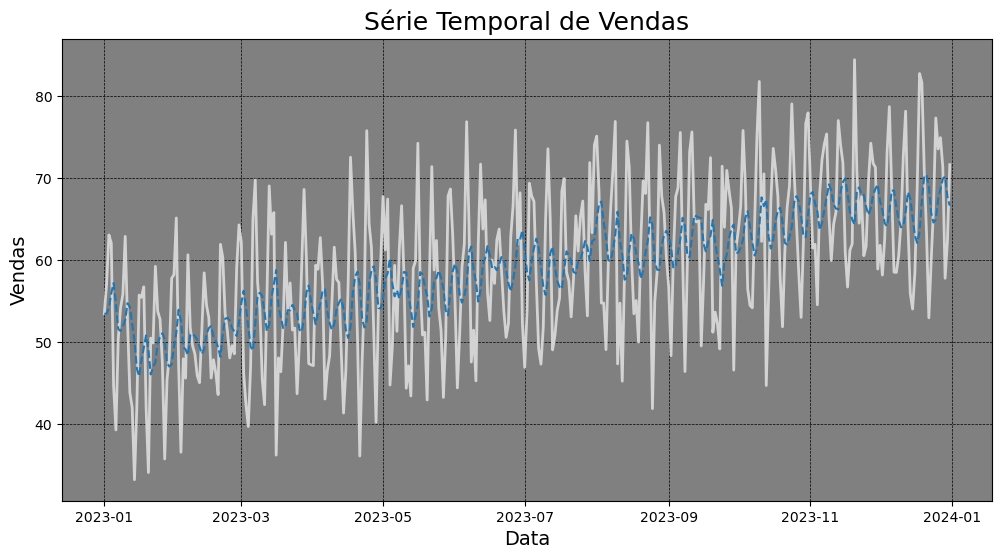

In [41]:
# Cria o gráfico da série temporal

# Criar o gráfico da série temporal com layout de contraste
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, color = 'lightgray', linewidth = 2)


# Configurar cores e estilo do gráfico
plt.gca().set_facecolor('gray')
plt.grid(color = 'blacK', linestyle = '--', linewidth = 0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.ylabel('Vendas', color ='black', fontsize = 14)
plt.title('Série Temporal de Vendas', color = 'black', fontsize = 18)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors  ='black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()

## Suavização Exponencial

In [37]:
# Cria o modelo
modelo = SimpleExpSmoothing(serie_temporal)

In [38]:
# Treinamento do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.2)

C:\Users\pc\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [39]:
# Extrai os valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

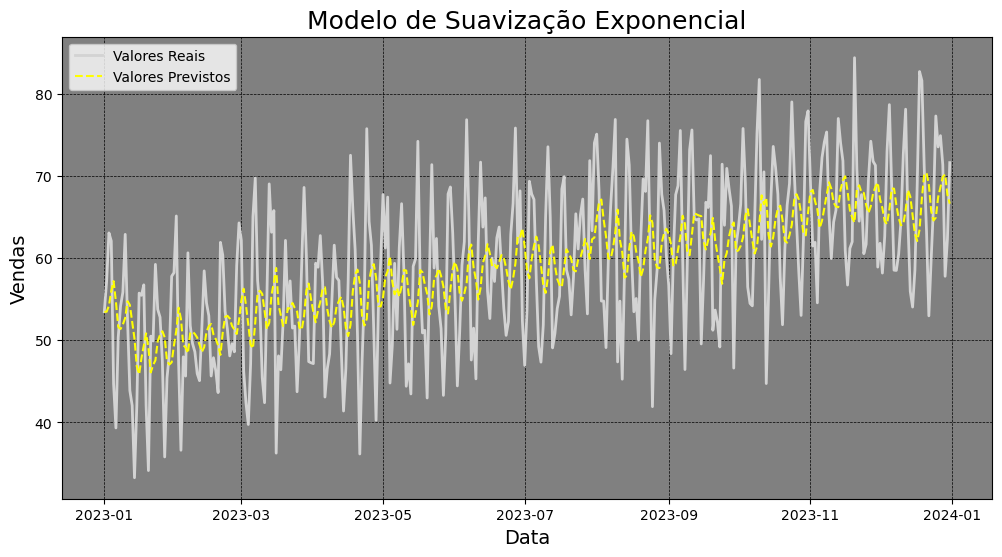

In [46]:
# Plot
# Cria o gráfico da série temporal

# Criar o gráfico da série temporal com layout de contraste
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, color = 'lightgray', linewidth = 2, label = "Valores Reais")


# Configurar cores e estilo do gráfico
plt.gca().set_facecolor('gray')
plt.grid(color = 'blacK', linestyle = '--', linewidth = 0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.ylabel('Vendas', color ='black', fontsize = 14)
plt.title('Modelo de Suavização Exponencial', color = 'black', fontsize = 18)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors  ='black')
plt.tick_params(axis = 'y', colors = 'black')

plt.plot(suavizacao_exponencial, label = 'Valores Previstos', linestyle = '--', color = "yellow")
plt.legend()

plt.show()

## Deploy

In [47]:
# Faz a previssão
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)
print("Previsão do Total de Vendas para Janeiro de 2024:", round(previsoes[0], 4))

Previsão do Total de Vendas para Janeiro de 2024: 67.6499
